In [8]:
%config InlineBackend.figure_format ='retina'
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import pandas as pd
import numpy as np
import os

import sys

sys.path.insert(0, '../')

from global_config import config

results_dir   = config.get_property('results_dir')
data_dir      = config.get_property('data_dir')

#%% Plot Tong's default setting
SMALL_SIZE  = 22
MEDIUM_SIZE = 22
BIGGER_SIZE = 22

plt.rc('font',   size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('axes',   titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes',   labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=SMALL_SIZE)   # fontsize of the tick labels"
plt.rc('ytick',  labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')


In [9]:
path_to_frcst_1 = os.path.join(results_dir, "forecast", "arima")
path_to_frcst_2 = os.path.join(results_dir, "forecast", "eakf_model1")
path_to_frcst_3 = os.path.join(results_dir, "forecast", "eakf_model2")
path_to_frcst_4 = os.path.join(results_dir, "forecast", "eakf_model3")

evals_df        = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation", "scores.csv"), parse_dates=["frsct_date"])
usa_df          = pd.read_csv(os.path.join(data_dir, "processed_data_us.csv"))
usa_df["date"]  = pd.to_datetime(usa_df["date"])
dates_forecasts = usa_df.date[11:].values


In [3]:
def create_df_ensemble(weights_df, forecast_df_list, name_models):
    e_df = [forecast_df_list[idx]* weights_df.loc[name_models[idx]]["weigth"] for idx in range(len(forecast_df_list))]
    e_df = sum(e_df)
    return e_df

In [10]:
all_past_df   = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation",  "BD_scores_all_past.csv"), parse_dates=["frsct_date"]); all_past_df["frsct_date"] = all_past_df["forecast_date"]
eq_weights_df = pd.read_csv( os.path.join(results_dir, "forecast", "evaluation", "BD_scores_equal_weights.csv"), parse_dates=["frsct_date"])
k_past_df     = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation",  "BD_scores_K_past.csv"), parse_dates=["frsct_date"]); k_past_df["frsct_date"] = k_past_df["forecast_date"]
k_past        = ['2_past_ens', '3_past_ens', '4_past_ens', '5_past_ens', '6_past_ens']
k_past_df     = pd.concat([k_past_df, all_past_df])


In [11]:
%config InlineBackend.figure_format ='retina'
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import seaborn as sns
import pylab

weekdict = {'1m': 1, '2m': 2, '3m': 3, '4m': 4, '5m': 5, '6m': 6}

def format_type_label_ensmelbe(s):
    if s == "all_past_ens":
        return "All past"
    else:
        return s[0]+" months"

NUM_COLORS = 6
cm         = pylab.get_cmap('gist_ncar')
paletteee  = [cm(idx_c/NUM_COLORS) for idx_c in range(NUM_COLORS)]


/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_75069/1815164972.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats_week["forecast_date"] = pd.to_datetime(df_stats_week["forecast_date"])
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_75069/1815164972.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats_week["forecast_date"] = pd.to_datetime(df_stats_week["forecast_date"])
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_75069/1815164972.py:7: SettingWithCop

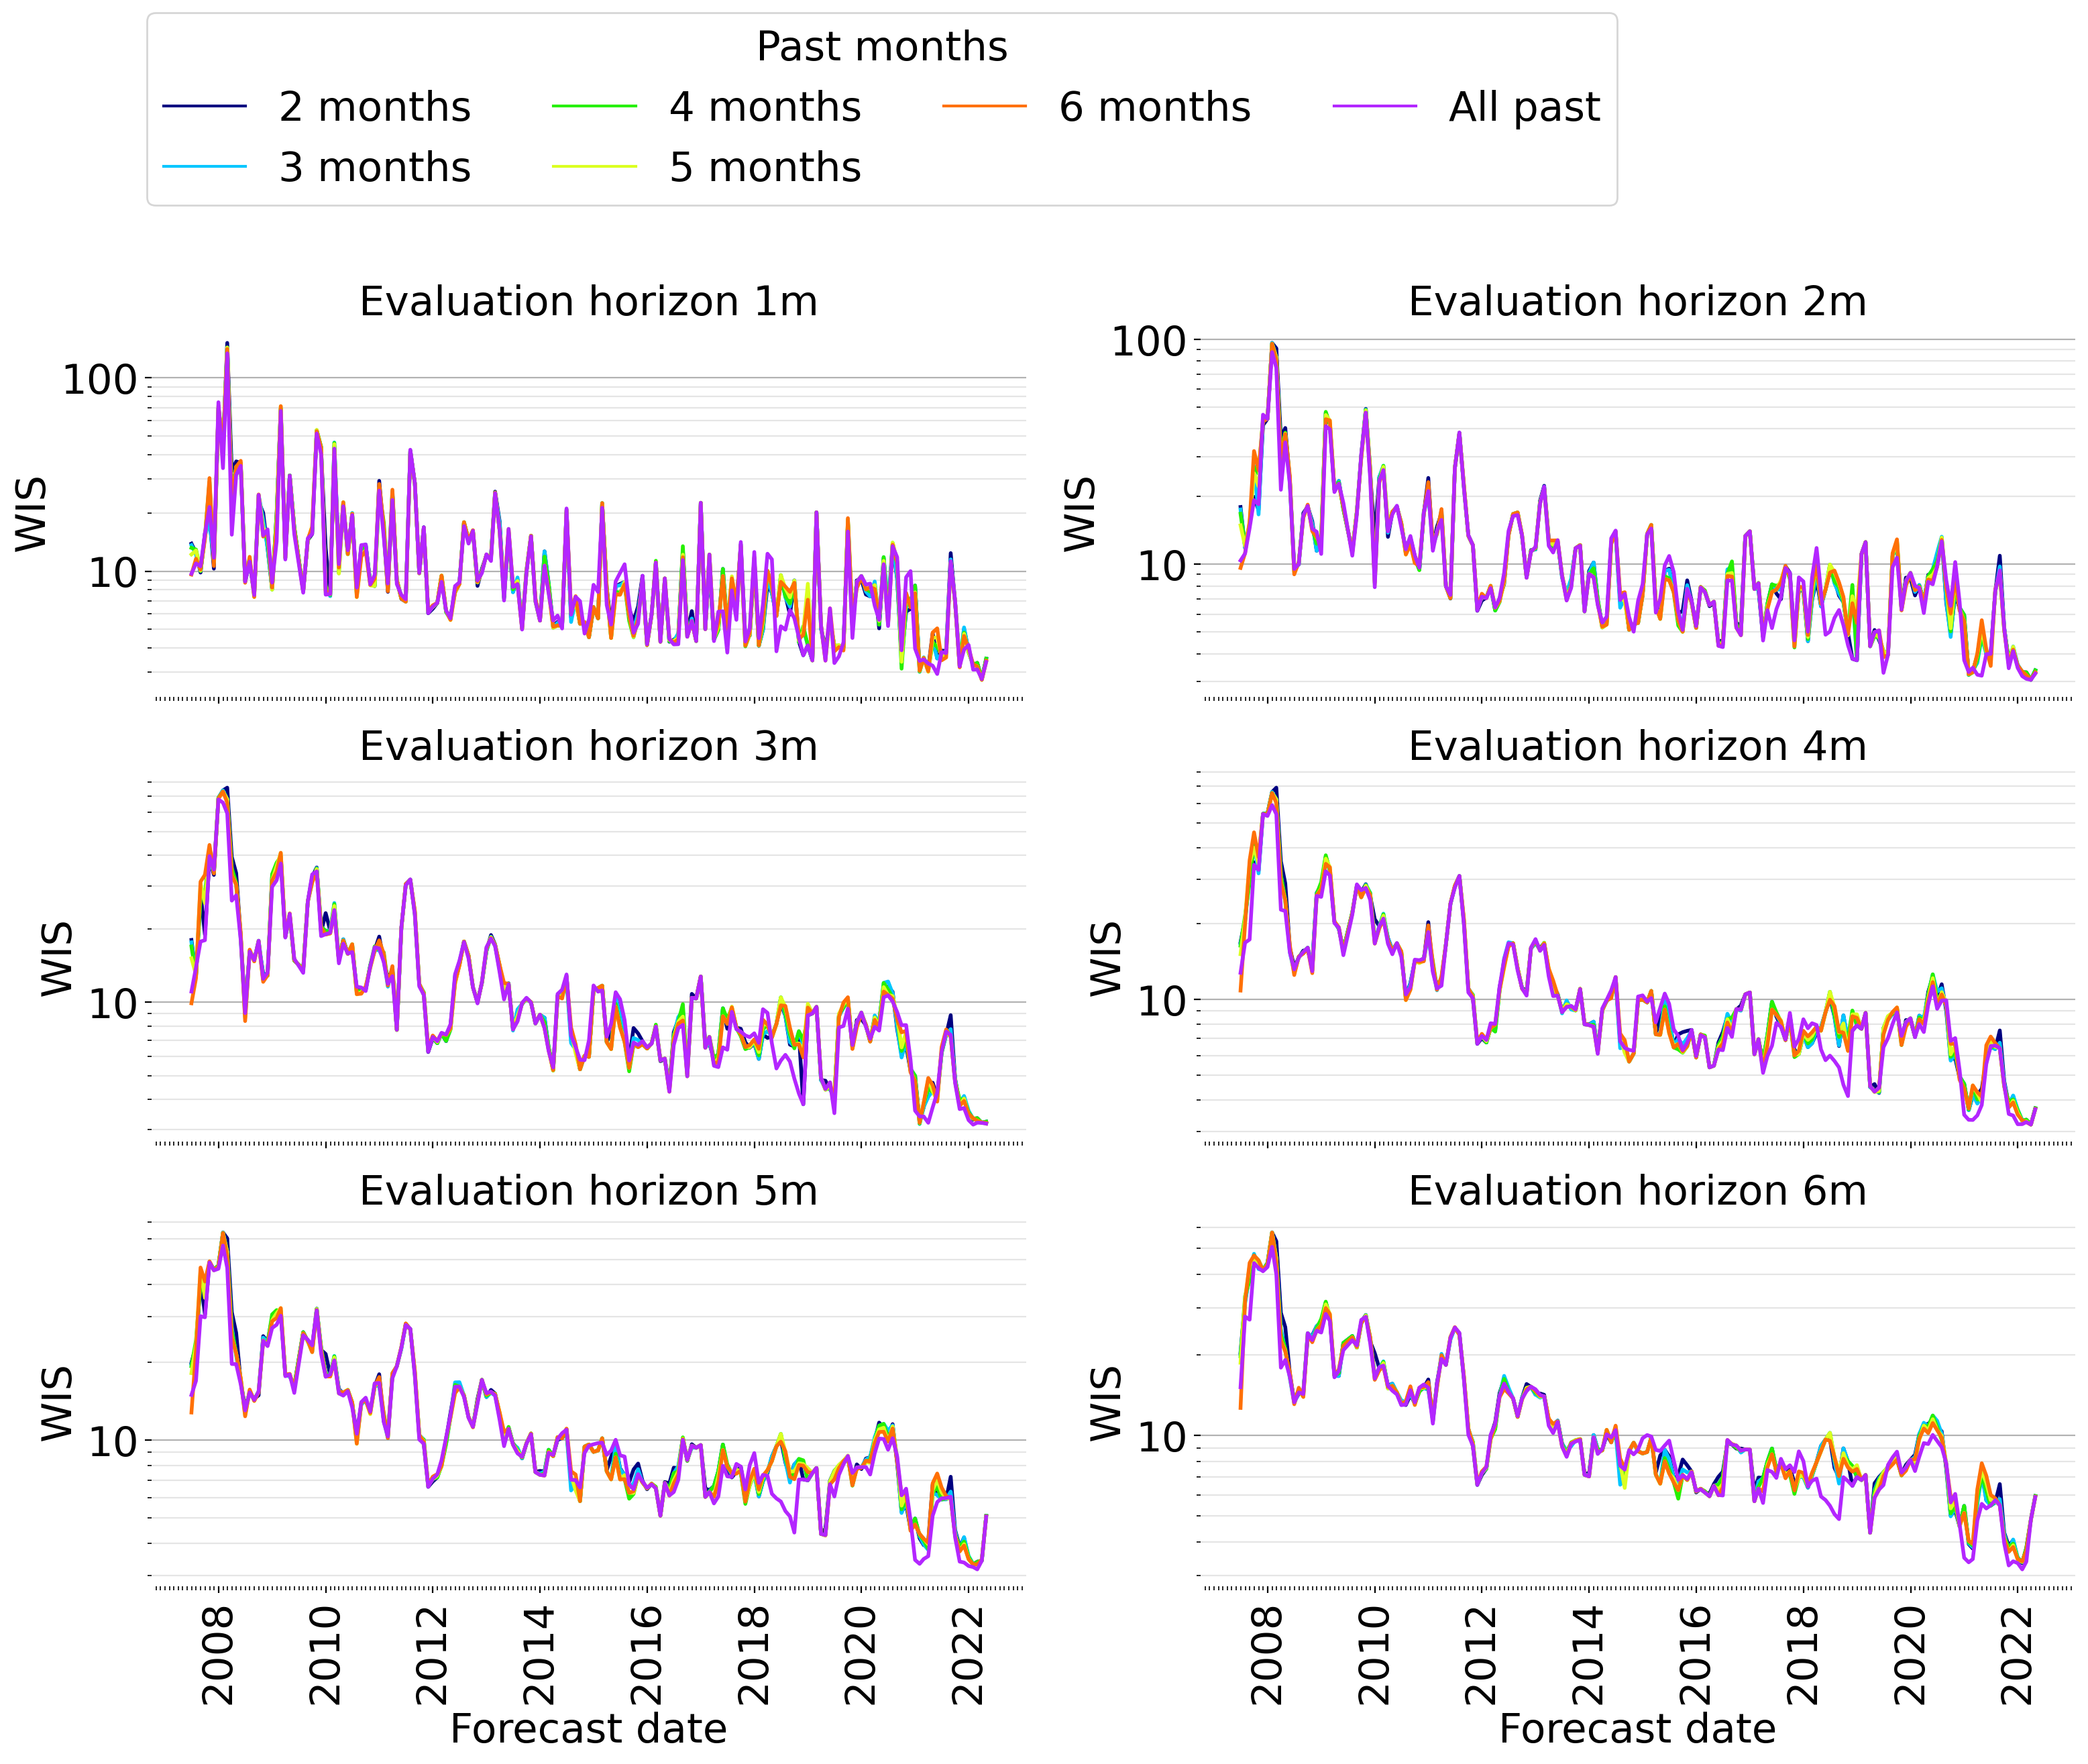

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(18.5, 12.2), sharex=True)

for idx_axi, ax in enumerate(axes.flatten()):
    kw = list(weekdict.keys())[idx_axi]

    df_stats_week                  = k_past_df[k_past_df.eval_horizon==kw]
    df_stats_week["forecast_date"] = pd.to_datetime(df_stats_week["forecast_date"])
    df_stats_week                  = df_stats_week.groupby(["forecast_date", "type_ensemble"]).mean().reset_index()
    df_stats_week["type_label"]    = df_stats_week.apply(lambda x: format_type_label_ensmelbe(x.type_ensemble), axis=1)

    sns.lineplot(ax=ax, data=df_stats_week, x="forecast_date", y="wis", linestyle='-', hue="type_label", palette=paletteee, lw=2)

    ax.set_title(f"Evaluation horizon {kw}")
    ax.set_yscale("log")
    ax.set_xlabel("Forecast date")

    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    ax.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
    ax.yaxis.set_minor_formatter(ticker.StrMethodFormatter(""))

    ax.tick_params(which='both', axis='x', labelrotation=90)
    ax.axhline(y=0, color="k", lw=1.5, linestyle="--")
    ax.set_ylabel('WIS')

    if idx_axi!=0:
        ax.legend().remove()
    else:
        ax.legend(loc='upper right', title="Past months", ncol=4, bbox_to_anchor=(1.7, 1.9))

fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", "performance_ensembles.png"), dpi=300, transparent=True)


In [17]:
scores_models_df = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_scores.csv"), parse_dates=["frsct_date"])

model_stats_df = scores_models_df.copy()
ens_stats_df   = k_past_df.copy()

eq_weights_resume_df = eq_weights_df

ens_stats_df         = ens_stats_df[ens_stats_df.method.isin(["2_past_ens", "3_past_ens", "4_past_ens", "5_past_ens", "6_past_ens", "all_past_ens"])]
ens_stats_df = ens_stats_df[ens_stats_df.eval_horizon_ensemble=="6m"]
plot_bars_df = pd.concat([model_stats_df, ens_stats_df, eq_weights_resume_df])


# All time series performance

In [21]:
years          = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pre_vac_years  = years[:6]
post_vac_years = years[6:]


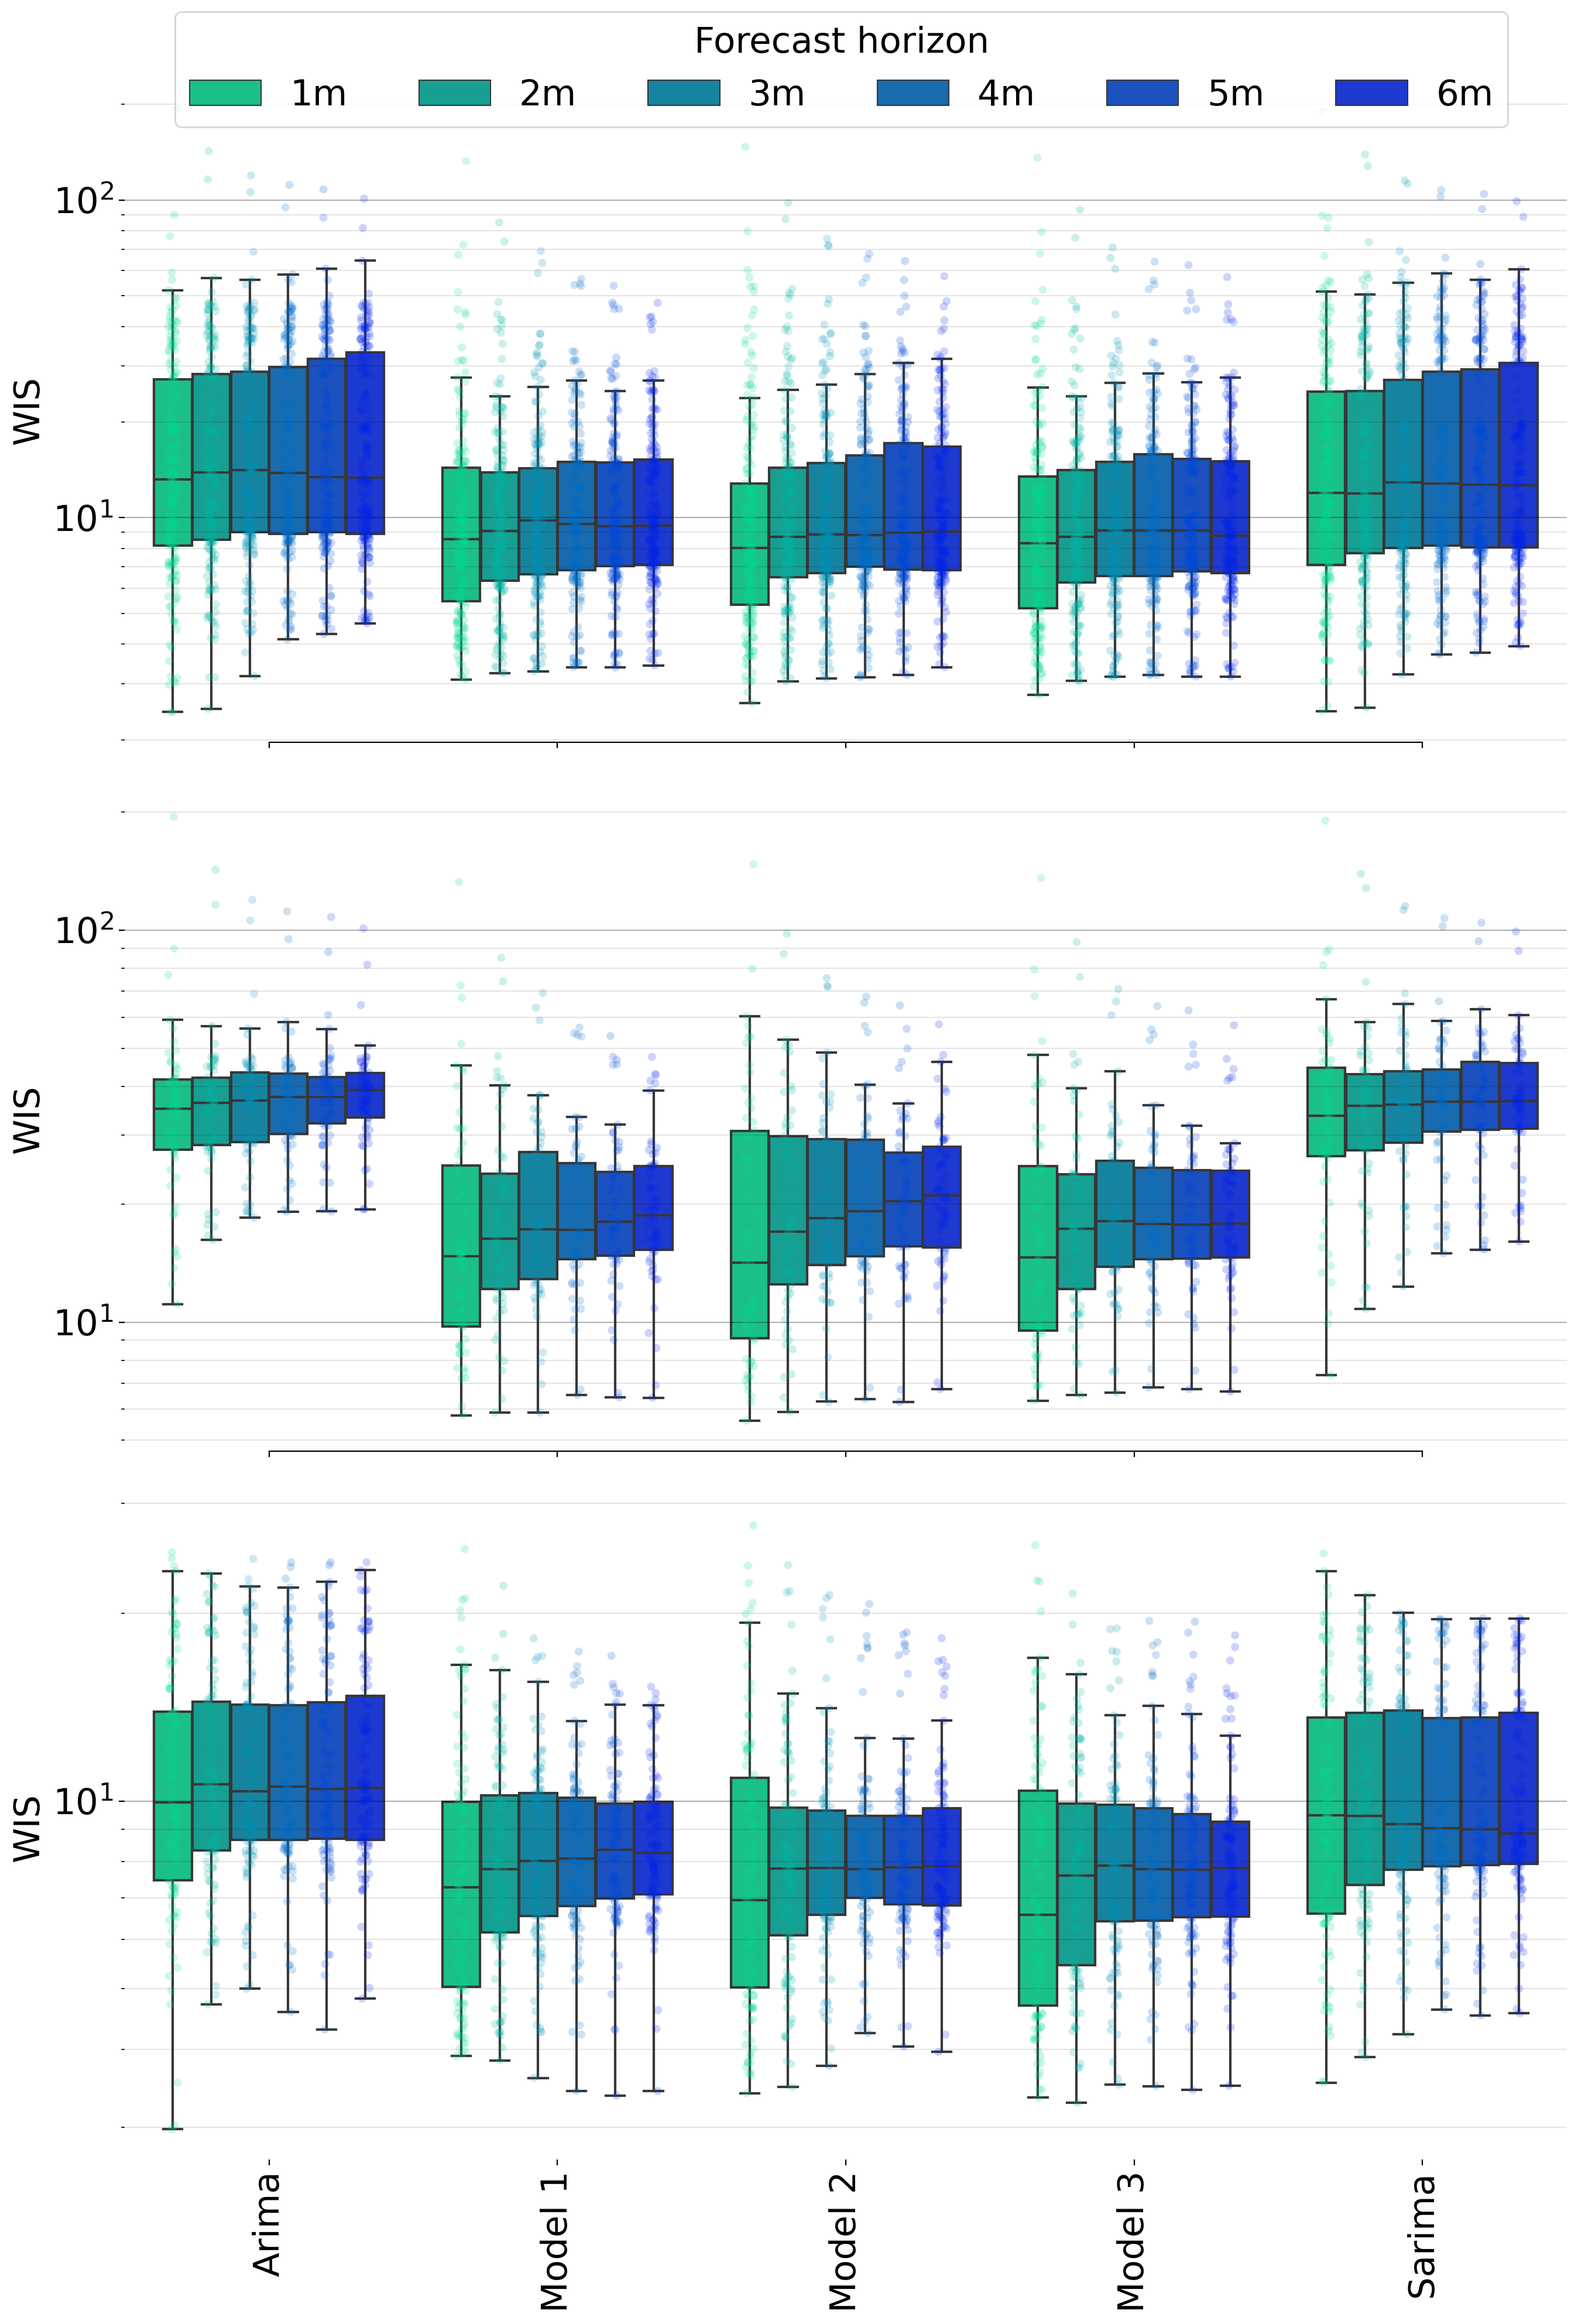

In [25]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "sarima": "Sarima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"]      = "All"
plot_bars_df["frsct_date"]  = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year']        = plot_bars_df.frsct_date.dt.year
plot_bars_df['year']        = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["arima", "sarima", "eakf_model1", "eakf_model2", "eakf_model3"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
sns.boxplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
sns.boxplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]

sns.boxplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles[:-6], labels[:-6], title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1.1), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()

plt.tight_layout()
fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", "performance_models_boxplot_stripplot.png"), dpi=300, transparent=True)


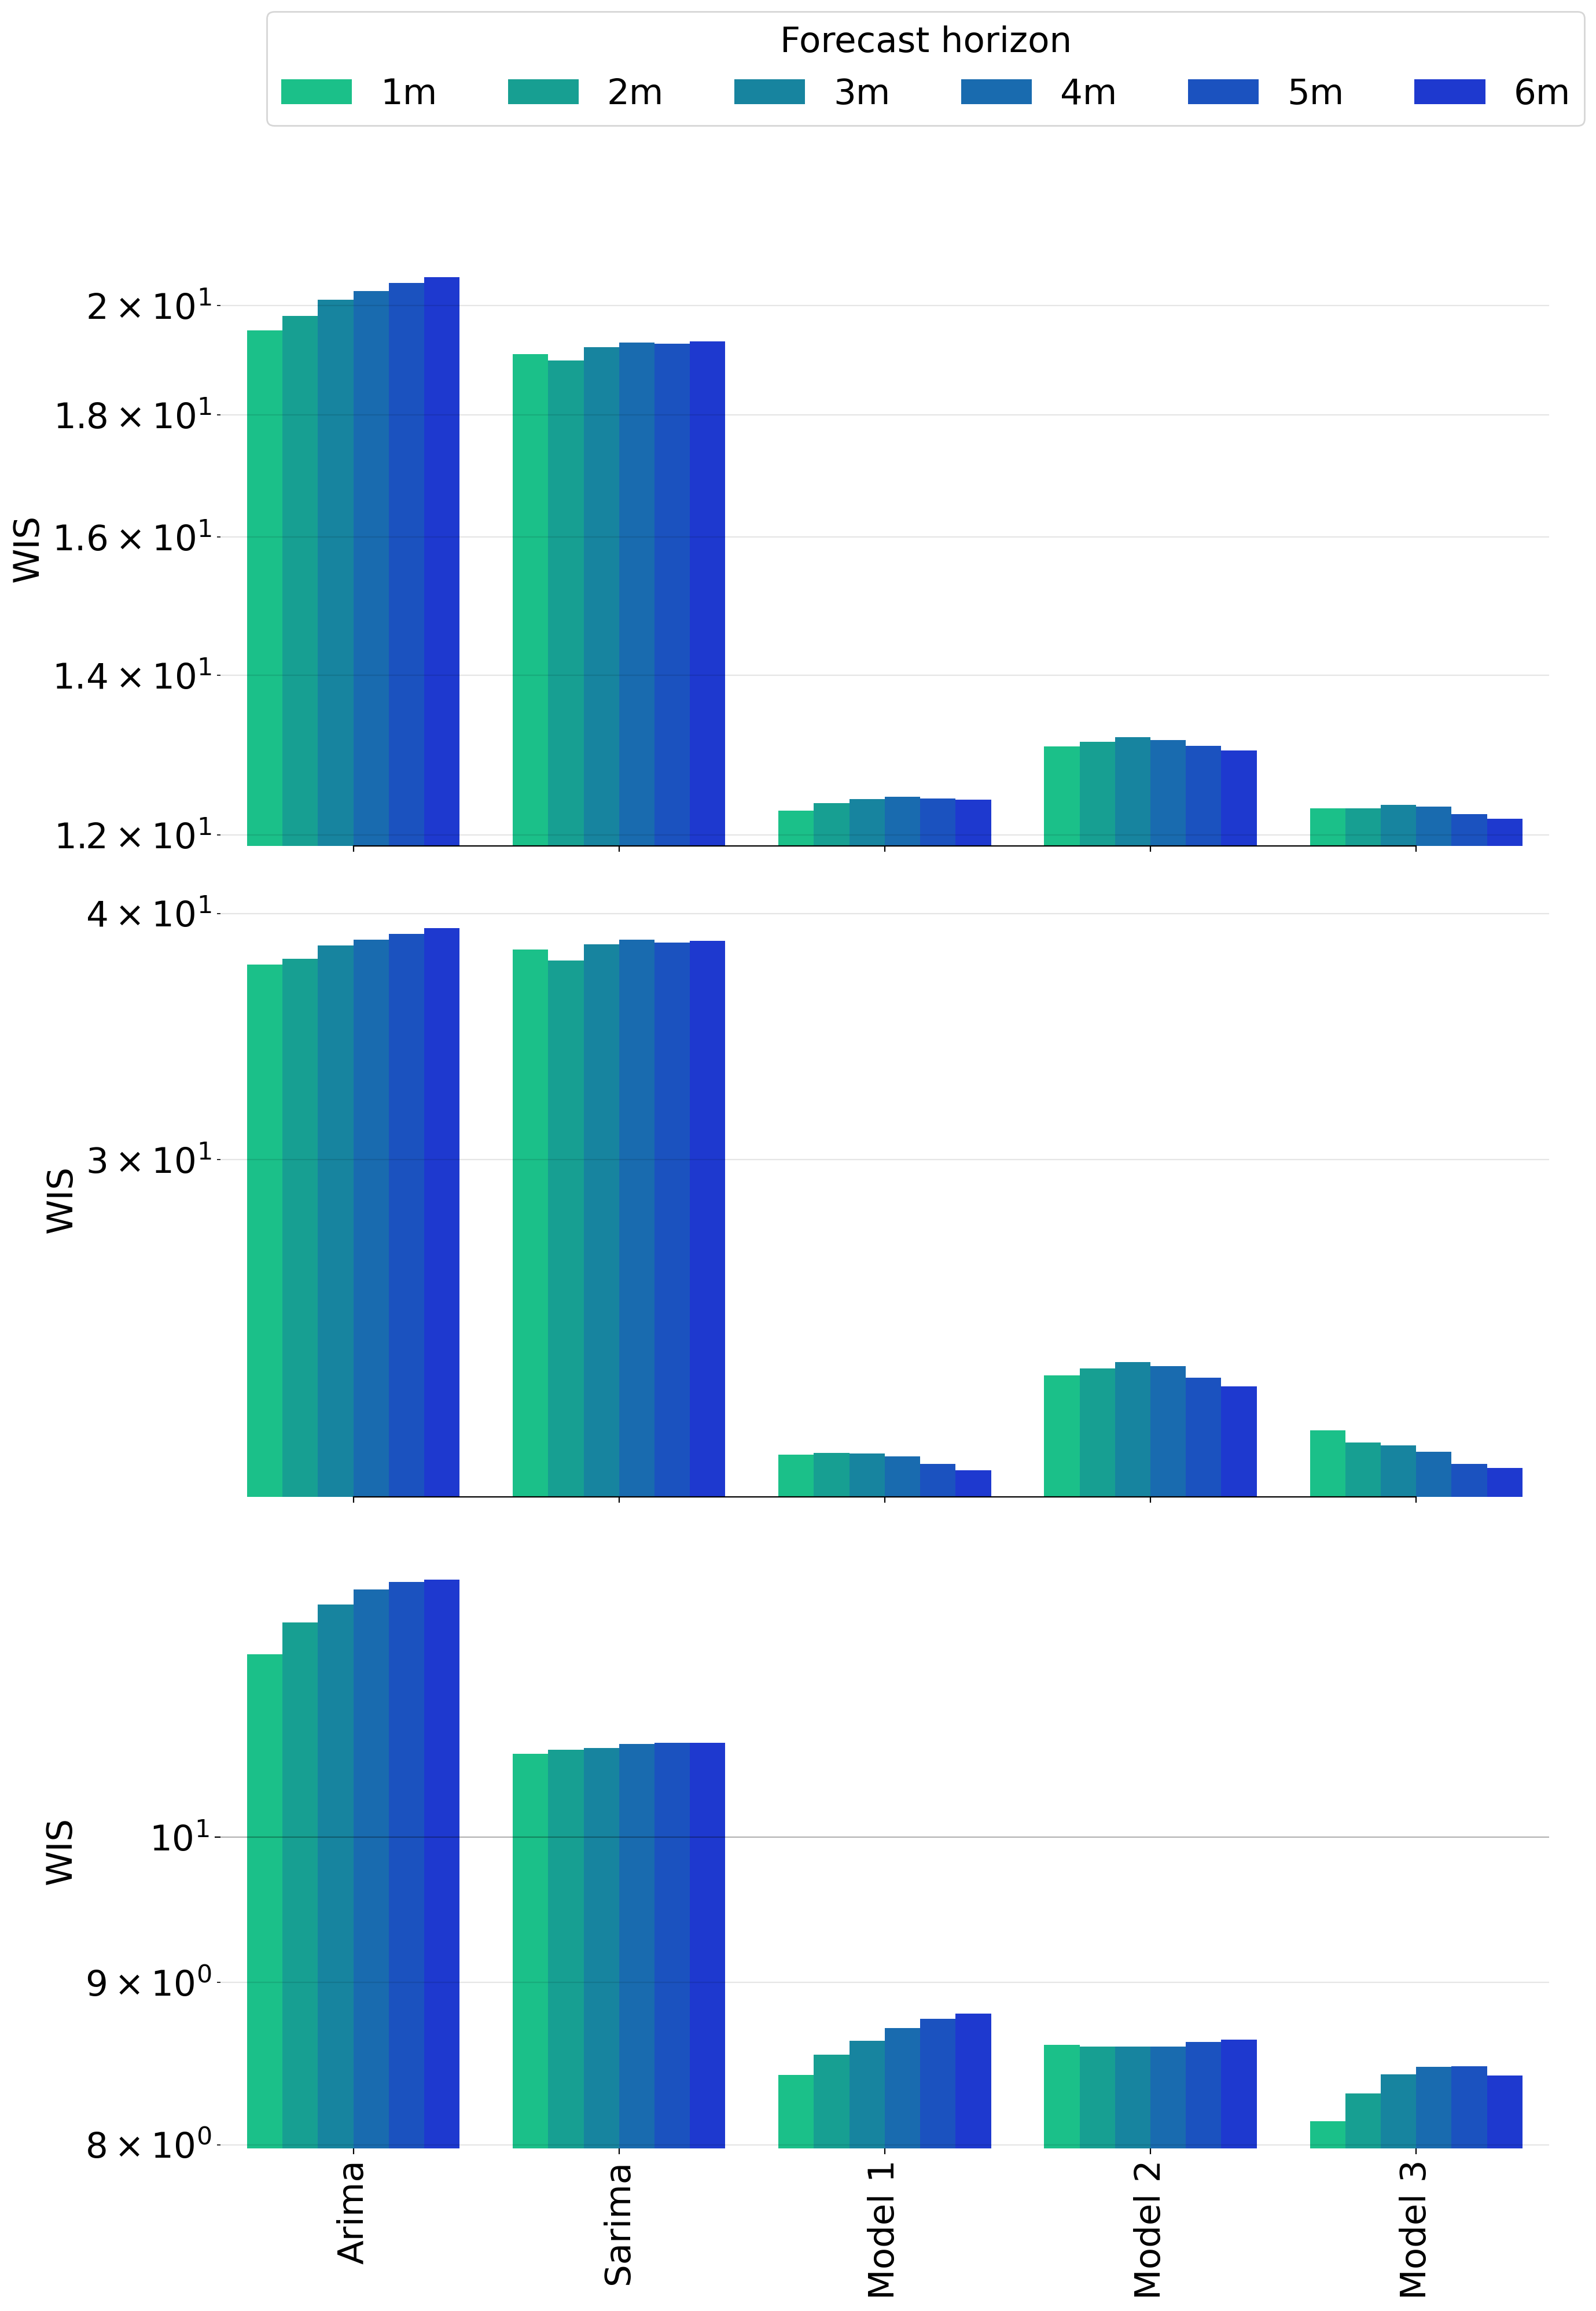

In [31]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "sarima": "Sarima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"]      = "All"
plot_bars_df["frsct_date"]  = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year']        = plot_bars_df.frsct_date.dt.year
plot_bars_df['year']        = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["arima", "sarima", "eakf_model1", "eakf_model2", "eakf_model3"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]
sns.barplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r")

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]
sns.barplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r")


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]
sns.barplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r")

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles, labels, title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1.4), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()

plt.tight_layout()
fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", "performance_models_boxplot_stripplot_meanBarplot.png"), dpi=300, transparent=True)


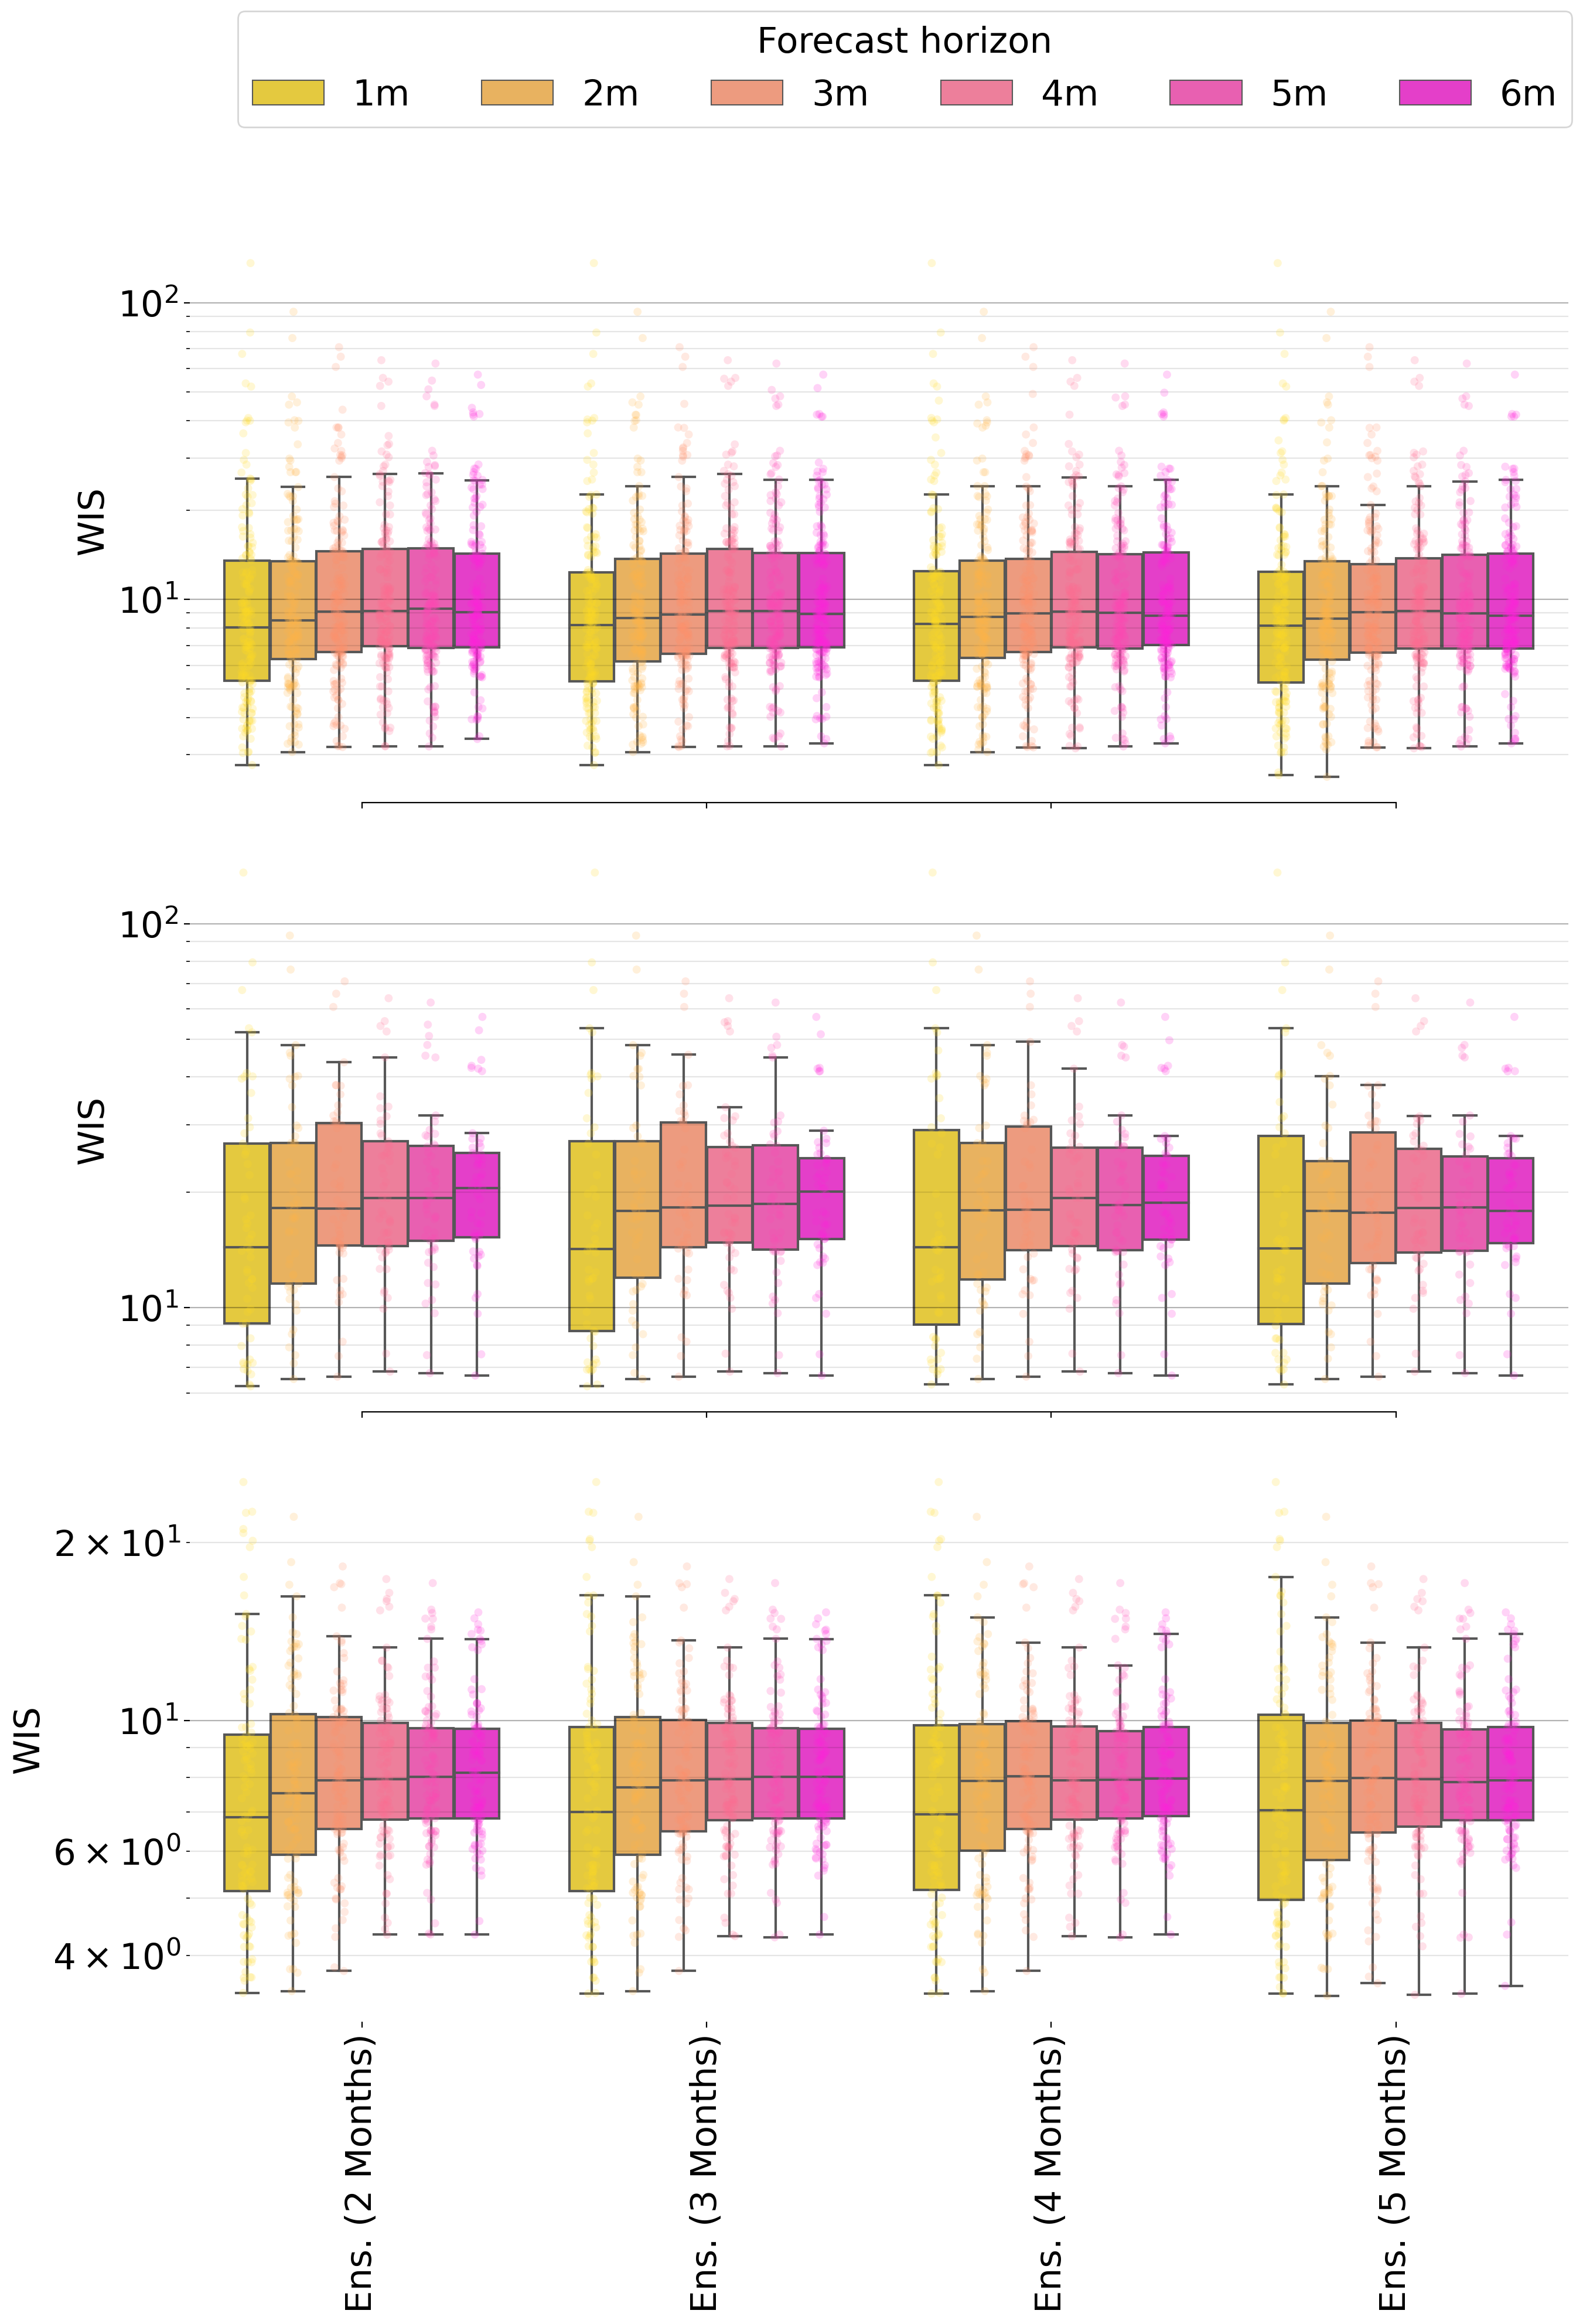

In [34]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "sarima": "Sarima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"]      = "All"
plot_bars_df["frsct_date"]  = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year']        = plot_bars_df.frsct_date.dt.year
plot_bars_df['year']        = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["2_past_ens", "3_past_ens", "4_past_ens", "5_past_ens"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
sns.boxplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r", dodge=True, linewidth=0, alpha=.2, label=None)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
sns.boxplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r", dodge=True, linewidth=0, alpha=.2, label=None)


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
sns.boxplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r", dodge=True, linewidth=0, alpha=.2, label=None)

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles[:-6], labels[:-6], title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1.4), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()

plt.tight_layout()
fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", "performance_kpast_ensemble.png"), dpi=300, transparent=True)


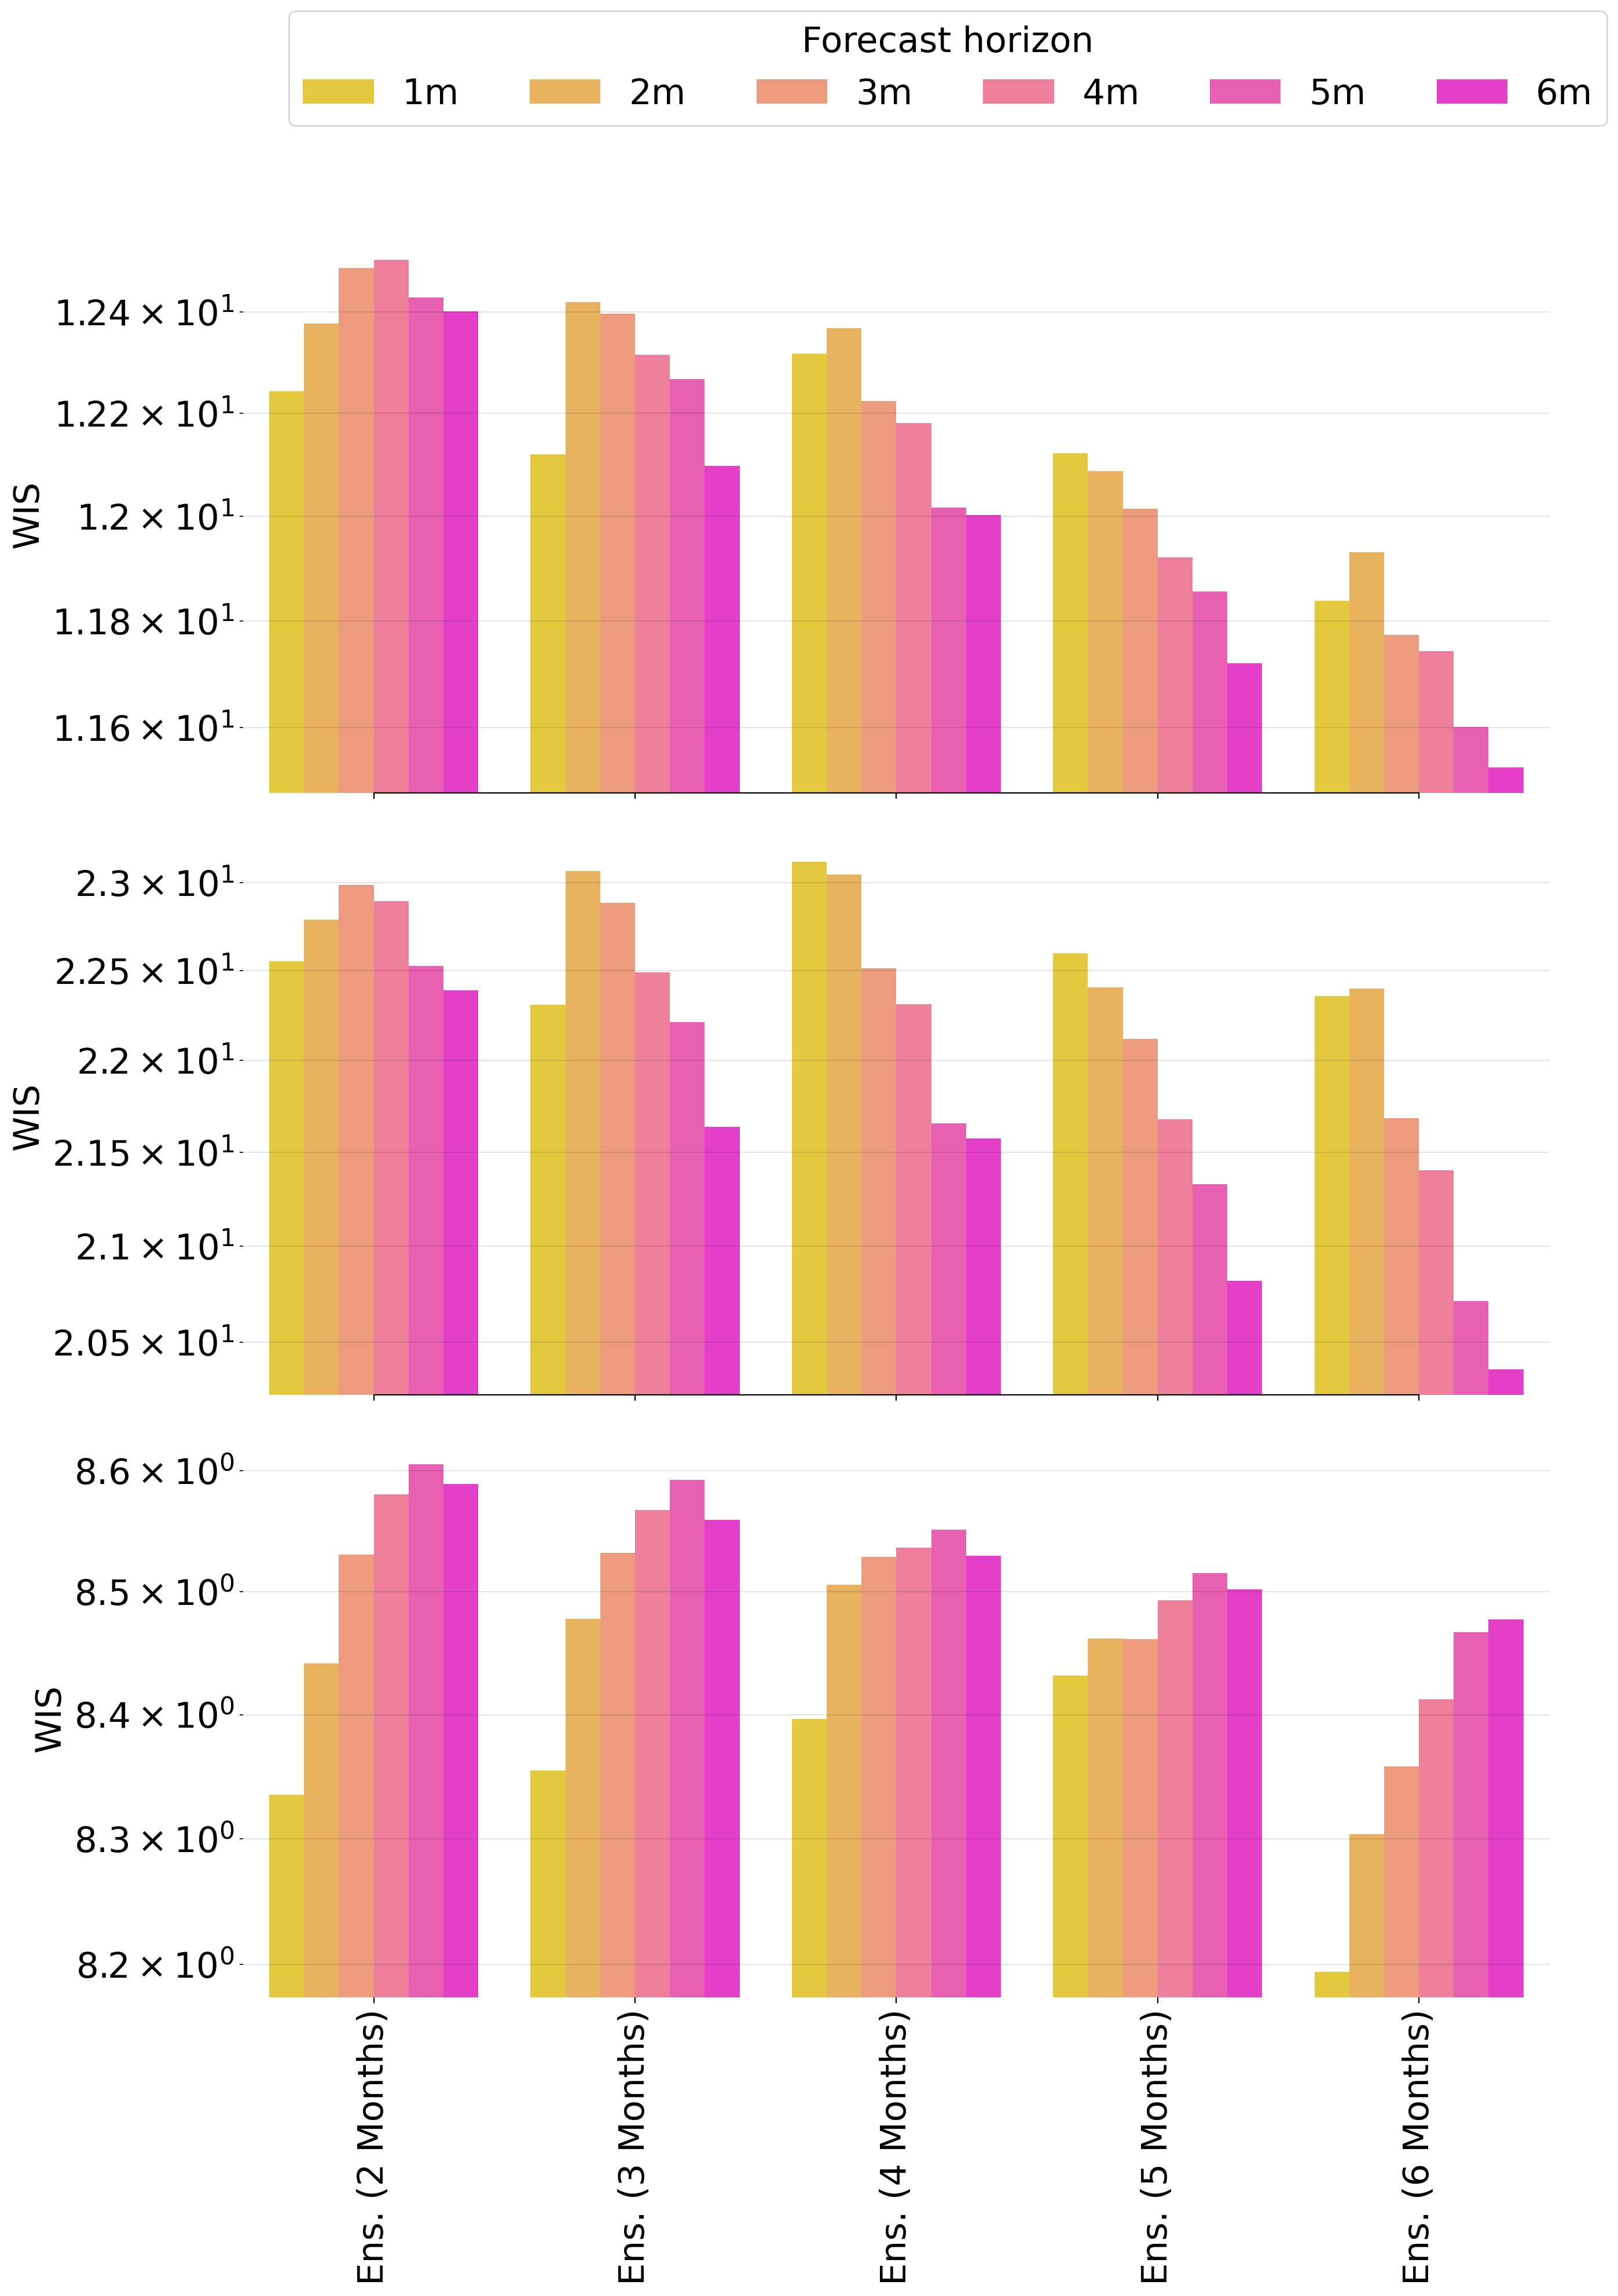

In [36]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "sarima": "Sarima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"]      = "All"
plot_bars_df["frsct_date"]  = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year']        = plot_bars_df.frsct_date.dt.year
plot_bars_df['year']        = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["2_past_ens", "3_past_ens", "4_past_ens", "5_past_ens", "6_past_ens"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]

sns.barplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r")

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]
sns.barplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r")


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]
sns.barplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="spring_r")

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles, labels, title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1.4), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()

plt.tight_layout()
fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", "performanceKpast_ensemble_meanBarplot.png"), dpi=300, transparent=True)


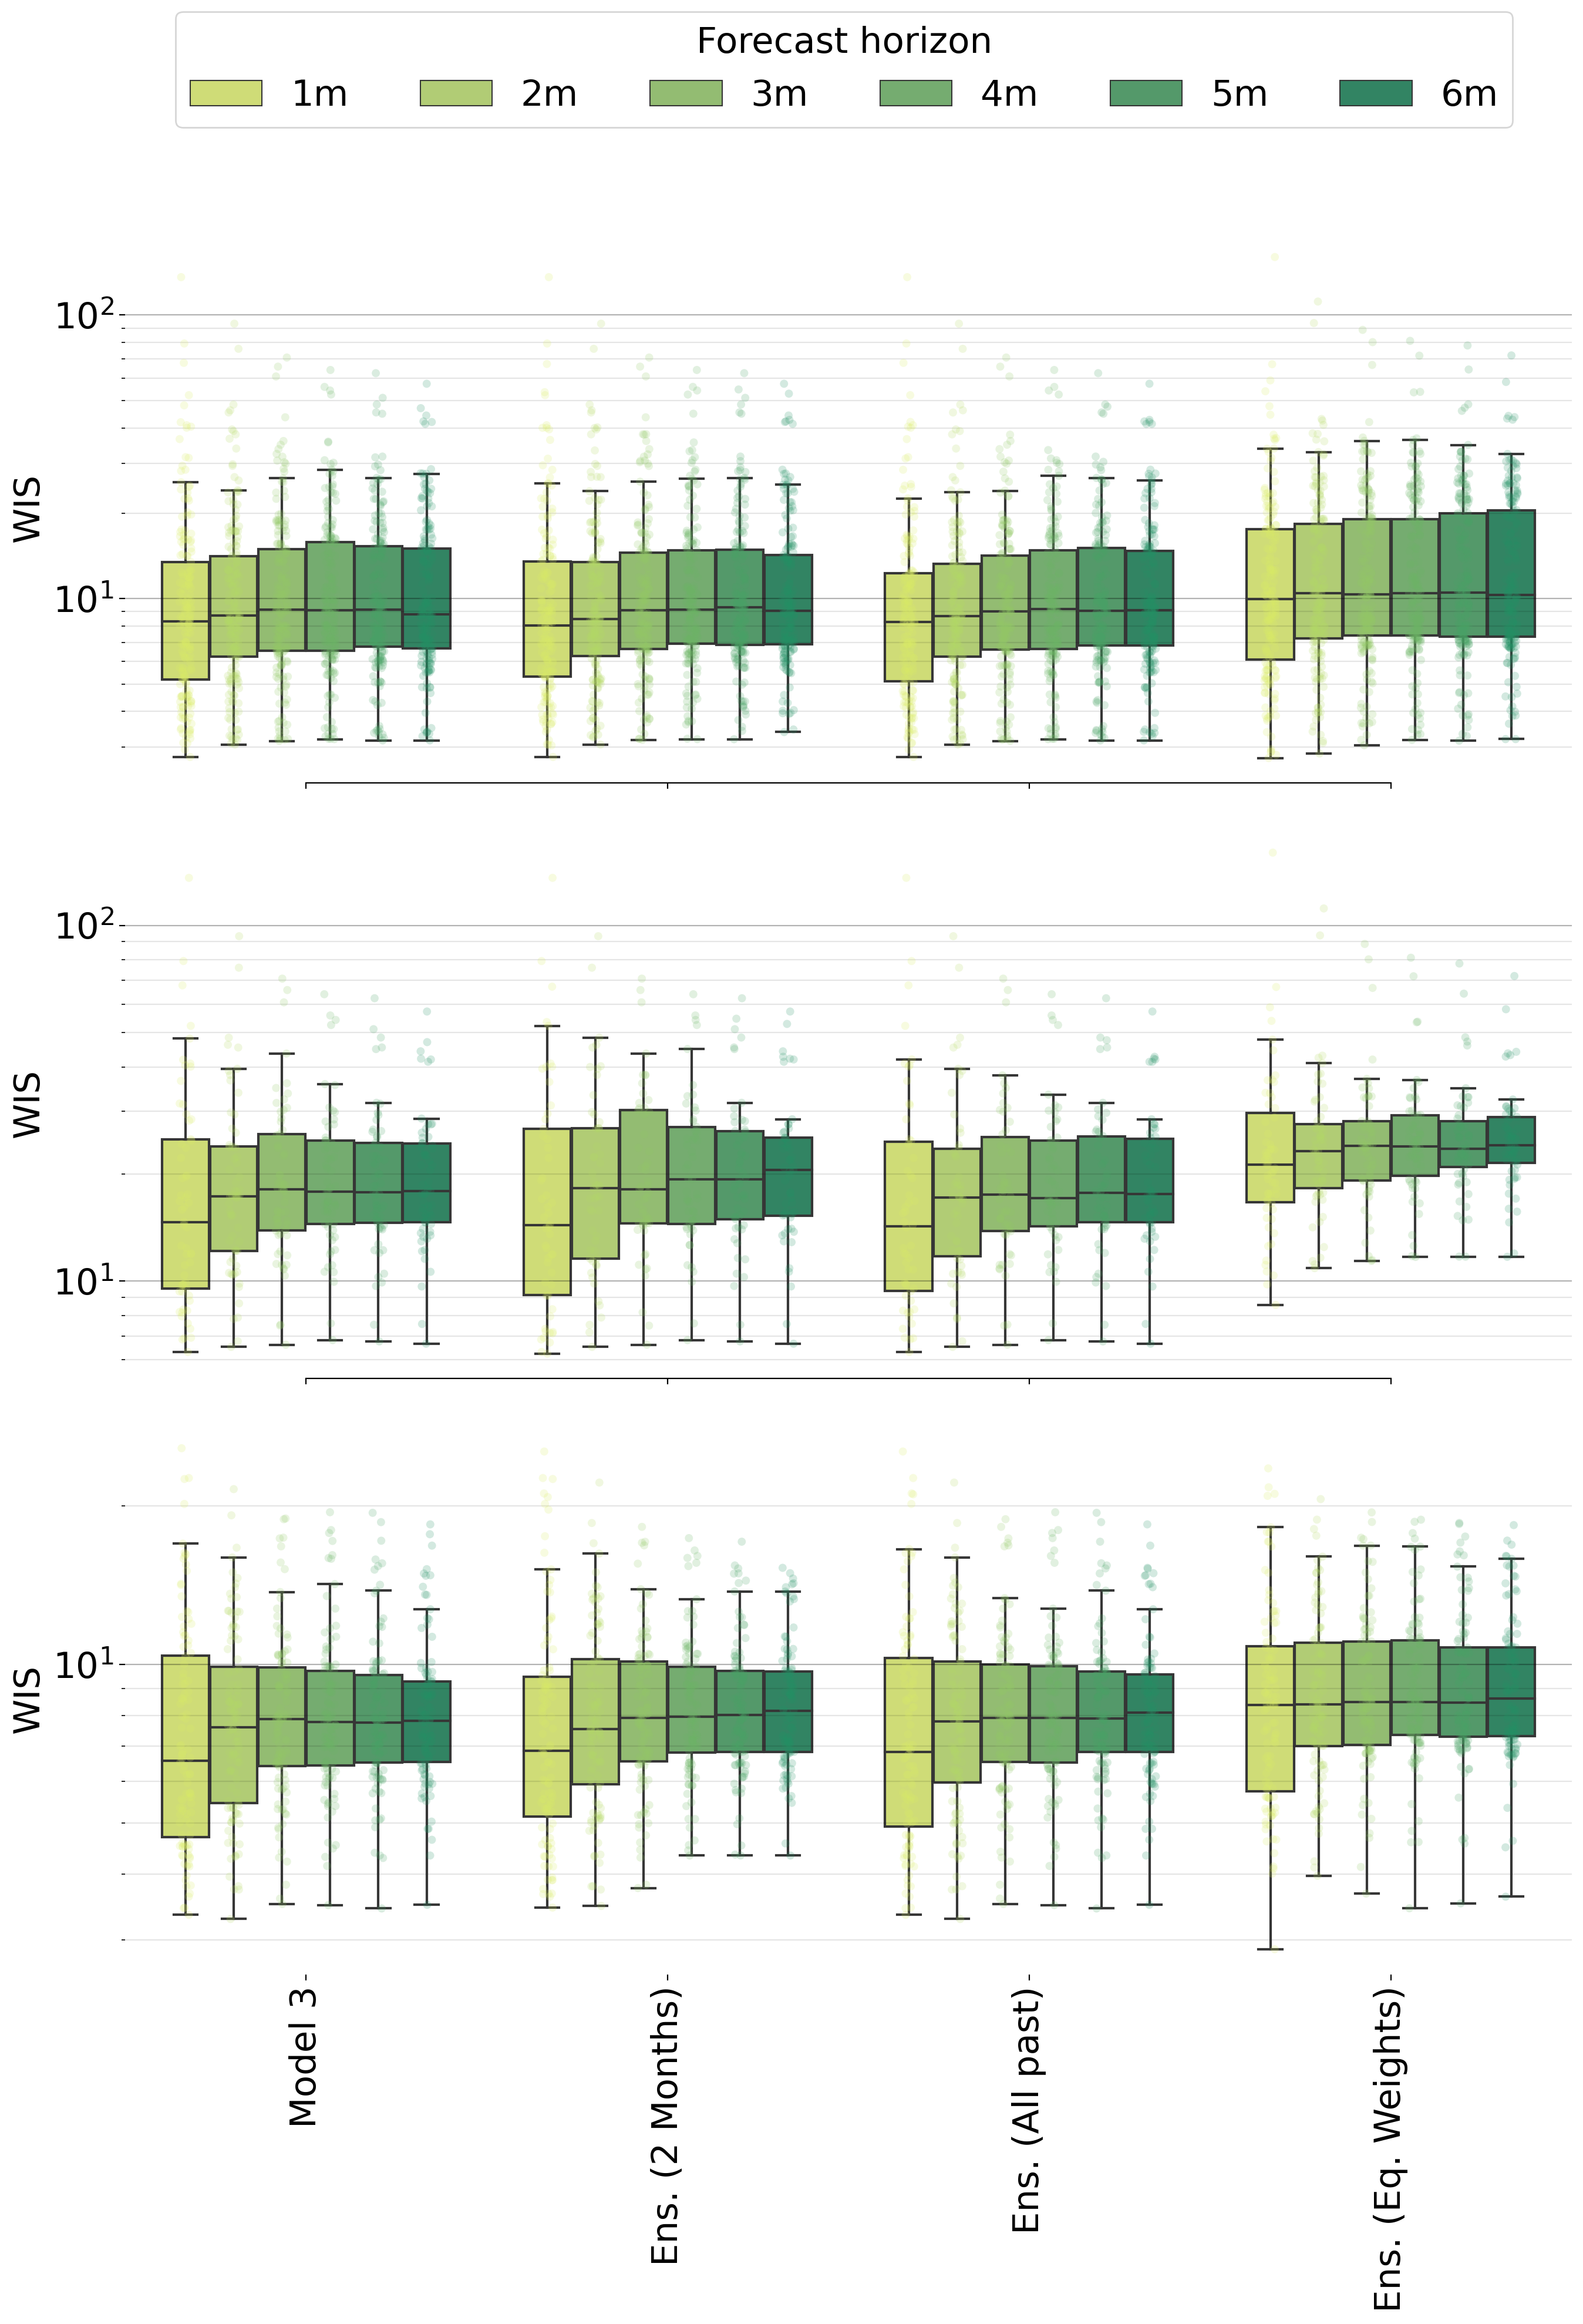

In [39]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "sarima": "Sarima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"]      = "All"
plot_bars_df["frsct_date"]  = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year']        = plot_bars_df.frsct_date.dt.year
plot_bars_df['year']        = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["eakf_model3", "2_past_ens", "all_past_ens", "equal_weights_ensemble"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
sns.boxplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
sns.boxplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
sns.boxplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles[:-6], labels[:-6], title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1.4), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()

plt.tight_layout()
fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", "performanceModelsEnsembles.png"), dpi=300, transparent=True)


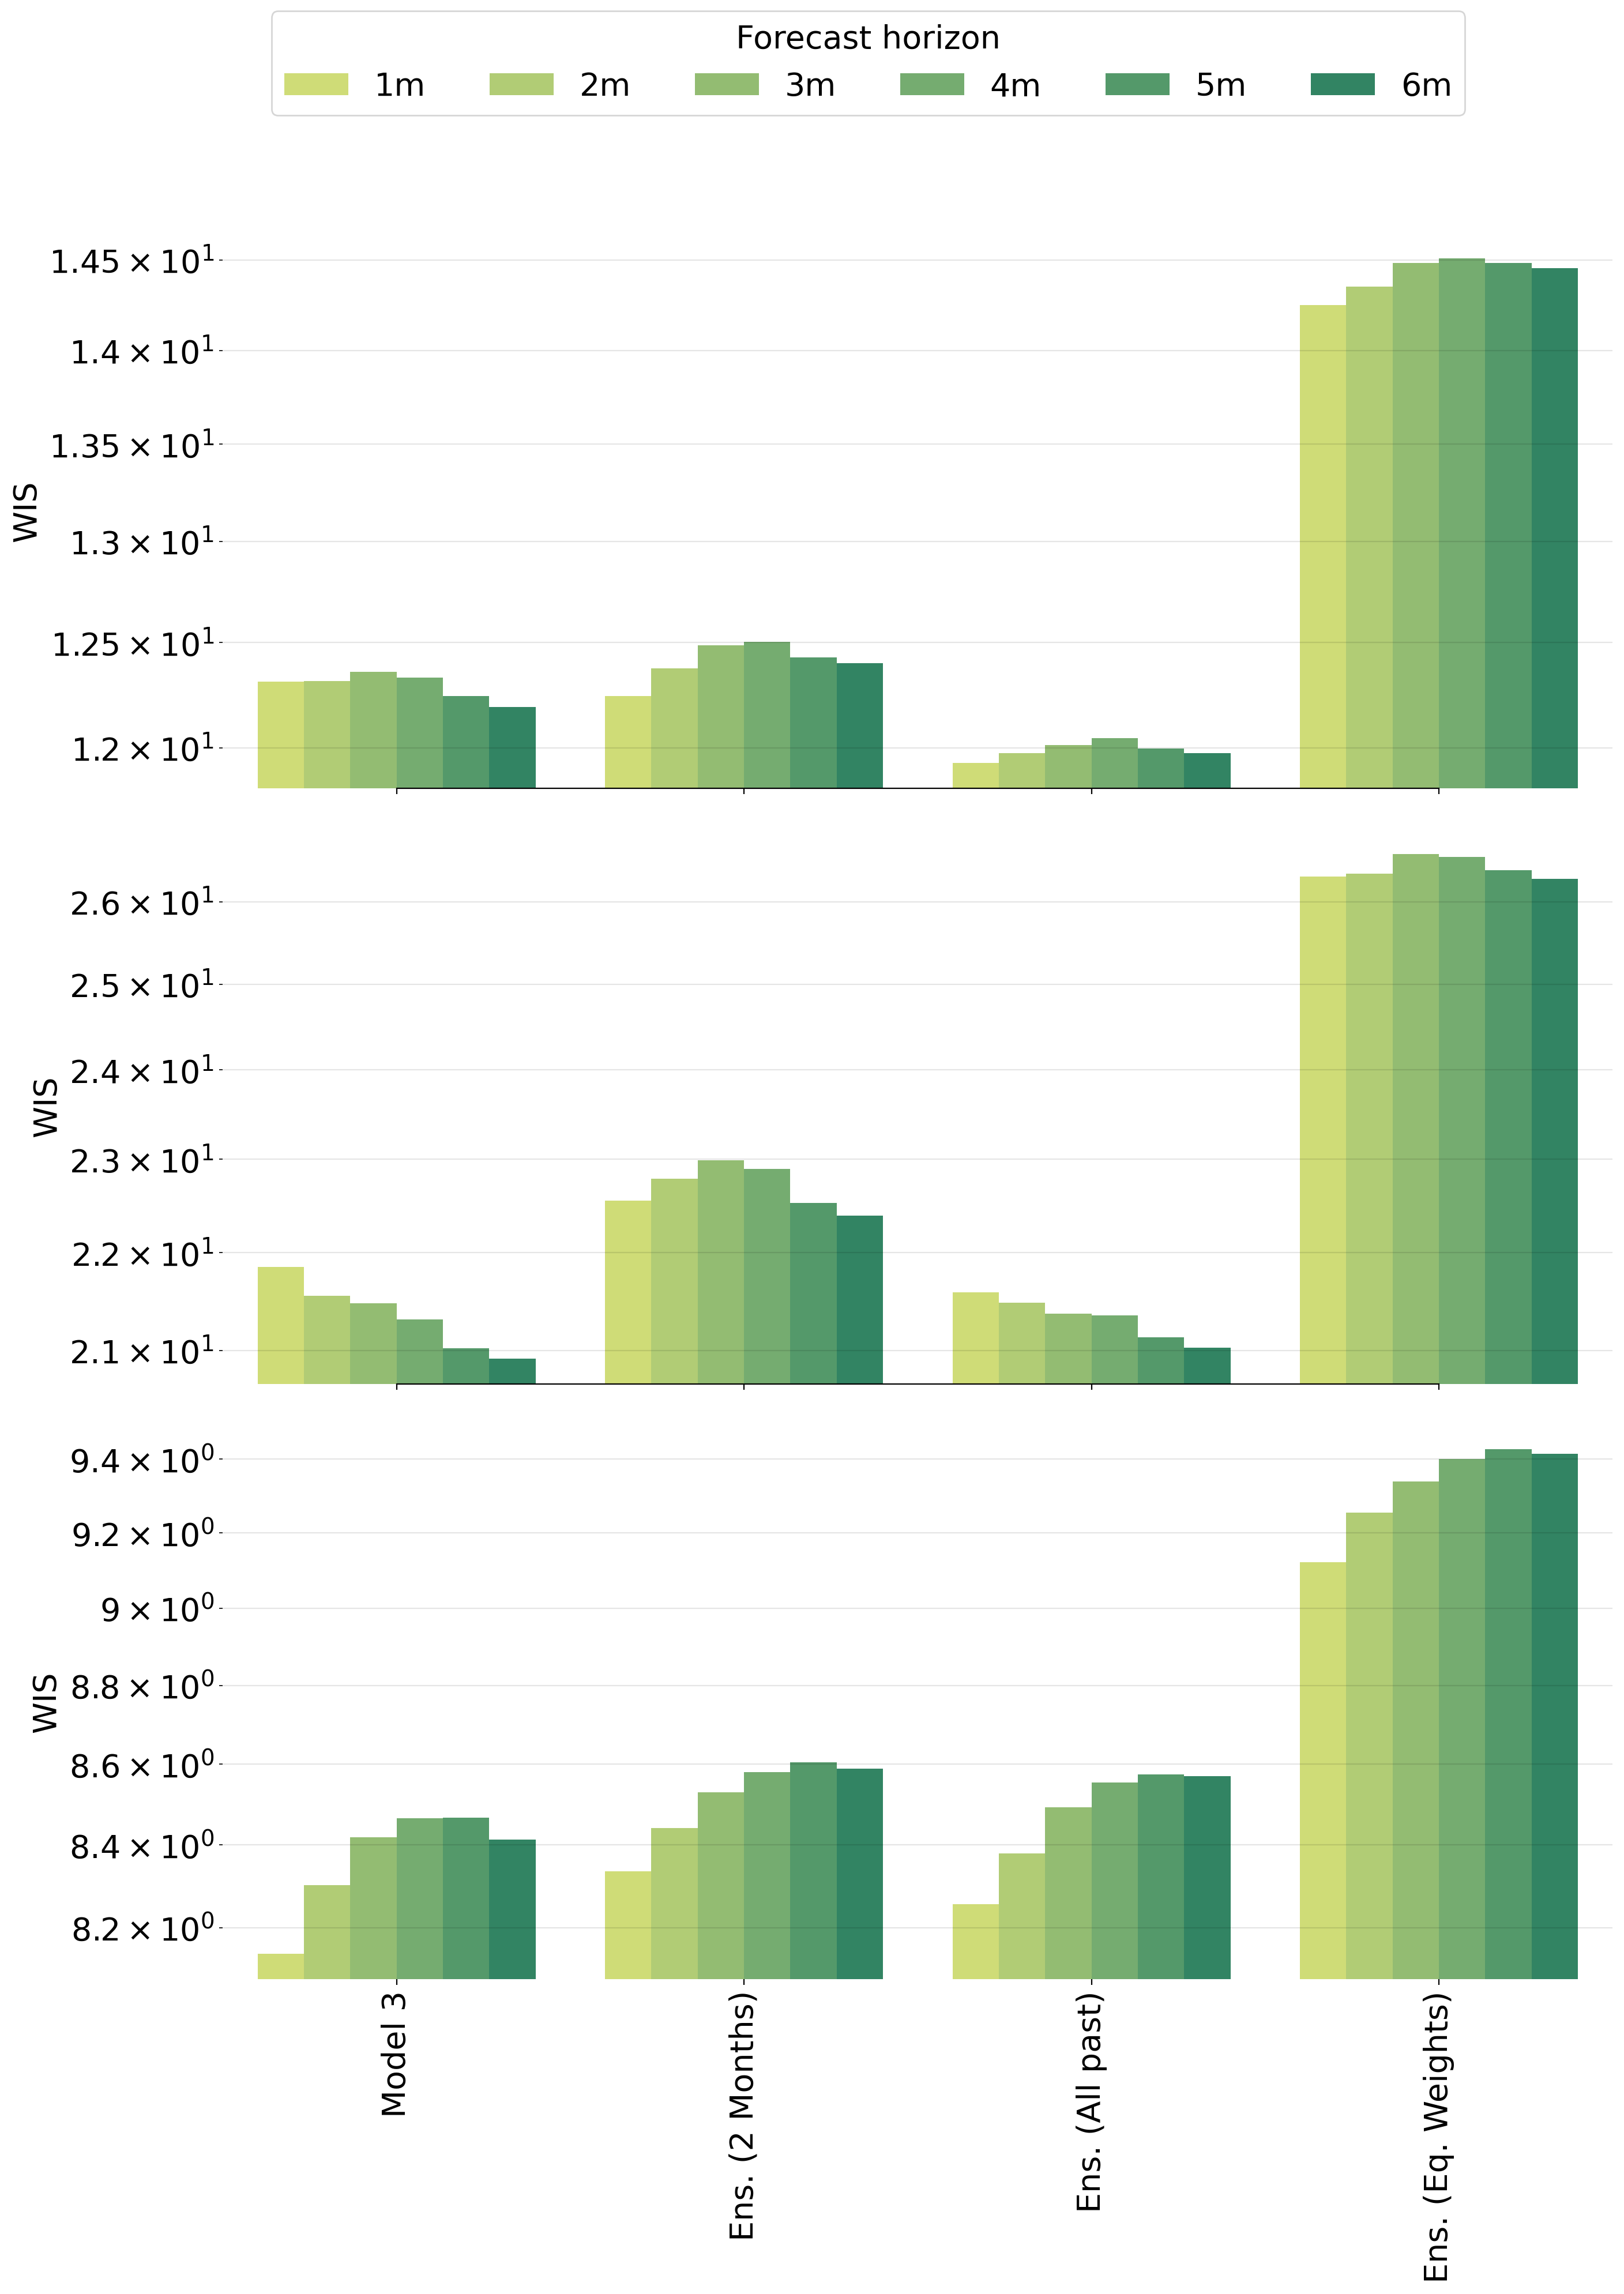

In [44]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "sarima": "Sarima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"]      = "All"
plot_bars_df["frsct_date"]  = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year']        = plot_bars_df.frsct_date.dt.year
plot_bars_df['year']        = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["eakf_model3", "2_past_ens", "all_past_ens", "equal_weights_ensemble"]


FONT_SIZE = 20
plt.rc('font',   size=FONT_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('axes',   titlesize=FONT_SIZE)  # fontsize of the axes title
plt.rc('axes',   labelsize=FONT_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=FONT_SIZE)  # fontsize of the tick labels"
plt.rc('ytick',  labelsize=FONT_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)   # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
plt.rc('text')

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]
sns.barplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r")

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]
sns.barplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r")


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
plt_bar_df = plt_bar_df.groupby(["method_plot", "method", "eval_horizon"]).mean().reset_index(); plt_bar_df = plt_bar_df.set_index("method").loc[models_plt]
sns.barplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r")

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles, labels, title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1.4), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()

plt.tight_layout()
fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", "performanceModelsEnsembles_meanBarplot.png"), dpi=300, transparent=True)
fig.savefig(os.path.join(results_dir, "figures", "paper_figs", "Figure4_BD.png"), dpi=300, transparent=True)
